# Assignment 2

* <b>Do not change the structure</b> of the notebook, only fill in the parts where your code needs to be filled in.

---

* Read carefully if the assignment asks for a Pandas **dataframe** or a Pandas **series**.

--- 

* For your notebook, <b>use as filename</b> `assignment02_vunetID.ipynb`, where `vunetID` is your three letter, three digit VU ID.

In [1]:
# read neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

### Customer database
Given is a table *orders* with product orders, and a table *customers* with customer info. Merge the two tables together such that the remaining table only has orders for which customer info is available. Assign the final dataframe to the variable *sales*.

In [2]:
orders = pd.DataFrame({'OrderID' : [1, 2, 3, 4, 5, 6, 7],
                       'CustID' : [1, 4, 3, 4, 1, 4, 5], 
                       'Amount' : [23.20, 2.30, 12.93, 54.92, 6.12, 9.60, 70.56]})

customers = pd.DataFrame({'ID' : [1, 2, 3, 4, 6], 
                          'First' : ["Henk", "Petra", "Sjoerd", "Mieke", "Sandjai"], 
                          'Last' : ["Janssen", "de Klomp", "Vermeulen", "Sterk", "Bhulai"],
                          'City' : ["Amsterdam", "Nijmegen", "Maastricht", "Amsterdam", "Diemen"]})

# YOUR CODE HERE
sales = pd.merge(orders, customers, left_on='CustID', right_on='ID', how='inner')
# YOUR CODE ENDS HERE

In [3]:
display(sales)

,OrderID,CustID,Amount,ID,First,Last,City
0,1,1,23.20,1,Henk,Janssen,Amsterdam
1,5,1,6.12,1,Henk,Janssen,Amsterdam
2,2,4,2.30,4,Mieke,Sterk,Amsterdam
3,4,4,54.92,4,Mieke,Sterk,Amsterdam
4,6,4,9.60,4,Mieke,Sterk,Amsterdam
5,3,3,12.93,3,Sjoerd,Vermeulen,Maastricht


The customer ID of "Sandjai Bhulai" is wrong. It should be 5 instead of 6. Correct the ID and calculate the sum of the sales values for each city. Assign the resulting series with only the total amount of sales to the variable *sales_per_city*.

In [4]:
# YOUR CODE HERE
sales["ID"].replace(6,5)

sales_per_city = sales.groupby('City')["Amount"].sum()
sales_per_city = sales_per_city.reset_index(name='TotalPrice')['TotalPrice']

# YOUR CODE ENDS HERE

In [5]:
print(type(sales_per_city))

<class 'pandas.core.series.Series'>


From the *sales* dataframe, create a new dataframe with as first column the first name (*First*) and the second column the sales amount (*Amount*). Assign this to the variable *new_sales*. Then calculate the total sales amount per person and assign that to the variable *person*. Create a bar plot of the resulting dataframe.

<Axes: xlabel='First'>

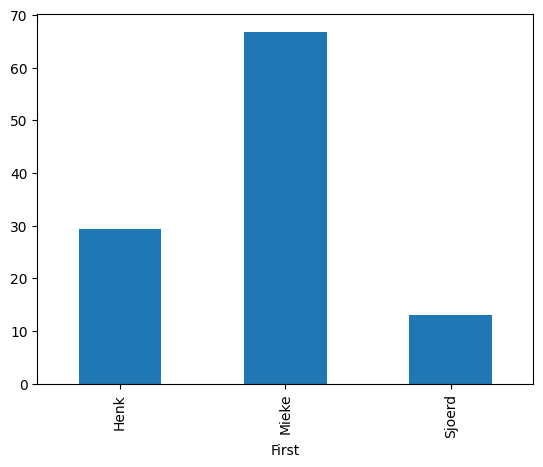

In [6]:
# YOUR CODE HERE
new_sales = sales[["First", "Amount"]]
person = new_sales.groupby("First")["Amount"].sum()
person.plot(kind="bar")
# YOUR CODE ENDS HERE

In [7]:
display(new_sales)

,First,Amount
0,Henk,23.20
1,Henk,6.12
2,Mieke,2.30
3,Mieke,54.92
4,Mieke,9.60
5,Sjoerd,12.93


### Course grades
The text that is listed below misses a separator between the courses and the grades. Create a regular expression to extract all the grades from the text and assign that value to the variable *avg_grade*. Note that you may have to cast the numbers (that are represented as strings) to floating point numbers.

In [8]:
import re
text = """Data_wrangling8.5
Machine_learning9.0
Advanced_machine_learning8.0
Reinforcement_learning7.5
"""

# YOUR CODE HERE
pattern = r'\d+.\d+\b'
# YOUR CODE ENDS HERE

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.findall(text)
# YOUR CODE HERE
result_float = [float(x) for x in result]

avg_grade = np.mean(result_float)
# YOUR CODE ENDS HERE

In [9]:
print(avg_grade)

8.25


### E-mail
Consider the following excerpt from an email. Write a regular expression that extracts the sender, recipient and the subject from the email.

In [10]:
import re
text = """From: Sandjai
To: the students following data wrangling
Subject: well done!
Body: I congratulate you all with mastering regular expressions.
It is a tough subject to learn. Good job.
"""
# YOUR CODE HERE
pattern = r'From: (.*)\nTo: (.*)\nSubject: (.*)'
# YOUR CODE ENDS HERE

regex = re.compile(pattern, flags=re.IGNORECASE)
result = regex.match(text).groups()

In [11]:
print('{} says "{}" to {}'.format(result[0], result[2], result[1]))

Sandjai says "well done!" to the students following data wrangling


### Orange juice
The file below contains sales data on three brands of orange juice over different weeks over different stores. Find out which store number has the highest and lowest mean income (using the variable *INCOME*). Assign the store numbers to the variables *max_store* and *min_store*, respectively.


In [12]:
oj = pd.read_csv('oj.csv')

# YOUR CODE HERE
oj.head(20)

mean_income_per_store = oj.groupby('store')["INCOME"].mean()


max_store = max(mean_income_per_store)
min_store = min(mean_income_per_store)
# YOUR CODE ENDS HERE

In [68]:
print("Store number of highest mean income: {}".format(max_store))
print("Store number of lowest mean income : {}".format(min_store))

Store number of highest mean income: 11.23619652
Store number of lowest mean income : 9.867082871


Create a dataframe with two rows (one for the best store *max_store*, and one for the worst store *min_store*). The columns are the weeks *week* of the orange juice dataset. The values in the dataframe are the sum of the sales (*logmove*) of all three brands. Assign the dataframe to the variable *store_sales*. Then create a plot of the sales with on the x-axis the weeks, and on the y-axis the sum of the sales (the sum of the *logmove*).

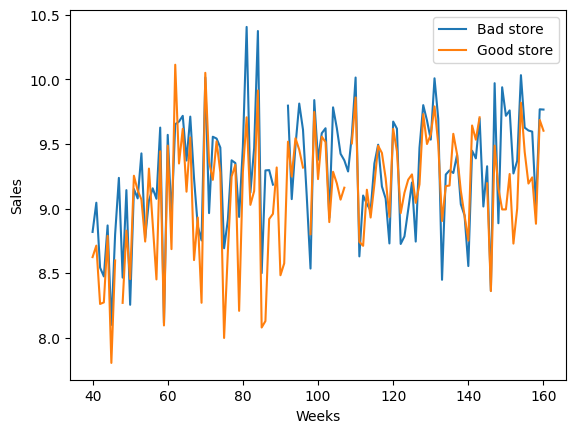

In [48]:
# YOUR CODE HERE
weeks = sorted(oj["week"].unique())

empty_cells = {col: [np.nan, np.nan] for col in weeks}
store_sales = pd.DataFrame(empty_cells)
worst_store = mean_income_per_store.idxmin()
best_store = mean_income_per_store.idxmax()

for week in weeks:
    store_sales[week][0]= oj[(oj["store"] == worst_store) & (oj["week"] == week)]["logmove"].mean()
    store_sales[week][1]= oj[(oj["store"] == best_store) & (oj["week"] == week)]["logmove"].mean()


store_sales.iloc[0].plot(label='Bad store')
store_sales.iloc[1].plot(label='Good store')

plt.xlabel('Weeks')
plt.ylabel('Sales')

# Customize the legend
plt.legend()

# Show the plot
plt.show()

In [63]:
display(store_sales)

,40,41,42,43,44,45,46,47,48,49,...,151,152,153,154,155,156,157,158,159,160
0,8.819451,9.045514,8.54317,8.475053,8.869689,8.100038,8.799991,9.237805,8.466024,9.142928,...,9.759962,9.271877,9.369060,10.032744,9.626782,9.604384,9.595925,9.018503,9.768486,9.766506
1,8.624622,8.713605,8.26200,8.273906,8.788980,7.805660,8.598659,NaN,8.270360,8.829590,...,9.267877,8.729152,9.000121,9.819950,9.438289,9.193788,9.241597,8.882655,9.685905,9.602640


,price,logmove
8373,3.87,9.373819
8374,3.87,9.368369
8375,3.87,9.570529
8376,3.87,9.400630
8377,3.87,9.329367
...,...,...
8719,2.09,7.491088
8720,1.94,7.714231
8721,1.94,8.236421
8722,1.49,10.157820


The previous picture does not explain why the best store does better than the worst store. Let us study if the price influences the sales. Prepare a dataframe with two columns (the column *price* and the column *logmove*), with records only related to *max_store*. Assign this dataframe to variable *oj1*. Also create a table with the *price* and *logmove* with only records for store *min_store*. Assign this dataframe to variable *oj2*. 

In [64]:
import statsmodels.api as sm

# YOUR CODE HERE
oj1 = oj[oj["store"] == best_store][["price", "logmove"]]
oj2 = oj[oj["store"] == worst_store][["price", "logmove"]]

# YOUR CODE ENDS HERE

fit1 = sm.OLS(oj1['logmove'], sm.add_constant(oj1['price'])).fit()
fit2 = sm.OLS(oj2['logmove'], sm.add_constant(oj2['price'])).fit()

print(fit1.params)
print(fit2.params)

const    9.153937
price   -0.014614
dtype: float64
const    10.876949
price    -0.672225
dtype: float64


In [65]:
display(oj1, oj2)

,price,logmove
8373,3.87,9.373819
8374,3.87,9.368369
8375,3.87,9.570529
8376,3.87,9.400630
8377,3.87,9.329367
...,...,...
8719,2.09,7.491088
8720,1.94,7.714231
8721,1.94,8.236421
8722,1.49,10.157820


,price,logmove
11490,3.87,8.971067
11491,3.87,8.392990
11492,3.87,9.018695
11493,3.87,8.624791
11494,3.87,8.476371
...,...,...
11839,1.97,8.528331
11840,1.94,8.868413
11841,1.68,9.510741
11842,1.49,10.806571


The previous analysis explains the difference between the two stores. The best store has almost no sensitivity to the price. The worst store has a high negative sensitivity to the price. Hence, the best store can charge higher prices than the worst store.

Let us now see which brand is the most popular. Create a series in with the three brands (*brand*) and the total number of the sales (sum of *logmove*). Assign the result to the variable *brand_sales*.

In [66]:
# YOUR CODE HERE
brand_sales = oj.groupby('brand')["logmove"].sum()
# YOUR CODE ENDS HERE

In [69]:
print(brand_sales)

brand
dominicks      88527.943226
minute.maid    88937.517267
tropicana      87916.698522
Name: logmove, dtype: float64


,store,brand,week,logmove,feat,price,AGE60,EDUC,ETHNIC,INCOME,HHLARGE,WORKWOM,HVAL150,SSTRDIST,SSTRVOL,CPDIST5,CPWVOL5
0,2,tropicana,40,9.018695,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
1,2,tropicana,46,8.723231,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
2,2,tropicana,47,8.253228,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
3,2,tropicana,48,8.987197,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
4,2,tropicana,50,9.093357,0,3.87,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,tropicana,146,8.378391,1,3.19,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
96,2,tropicana,147,9.757305,0,2.69,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
97,2,tropicana,148,8.647519,0,3.19,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927
98,2,tropicana,149,8.831712,0,3.19,0.232865,0.248935,0.11428,10.553205,0.103953,0.303585,0.463887,2.110122,1.142857,1.92728,0.376927


The column *feat* determines if the orange juice is on sale. Create a dataframe with as row the different brands of orange juice (*brand*) and as columns the indicator for the sale (*feat*). The values in the dataframe contain the mean price of the specific orange juices. Assign the value to the variable *featured*.

In [74]:
# YOUR CODE HERE
featured = pd.DataFrame(brand_sales)

feats = oj["feat"].unique()
empty_cells = {col: [np.nan, np.nan, np.nan] for col in feats}
featured = pd.DataFrame(empty_cells)




display(featured)
# YOUR CODE ENDS HERE

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


In [71]:
display(featured)

,logmove
brand,
dominicks,88527.943226
minute.maid,88937.517267
tropicana,87916.698522
